Ch05_Q08

We will now perform cross-validation on a simulated data set.
(a) Generate a simulated data set as follows:

rng = np.random.default_rng(1)

x = rng.normal(size=100)

y = x - 2 * x**2 + rng.normal(size=100)

In this data set, what is n and what is p? Write out the model
used to generate the data in equation form.

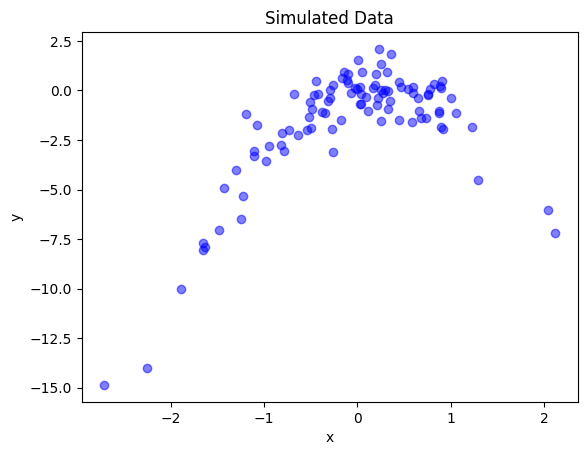

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the data
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

# Plot the data
plt.scatter(x, y, color='blue', alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Simulated Data")
plt.show()


n is the number of data points = 100

p is the number of predictors or features in the model = 1

The model used to generate the data can be written as:
 $ Y = x − 2x^2 + 𝜖 $


(b) Create a scatterplot of X against Y . Comment on what you find.

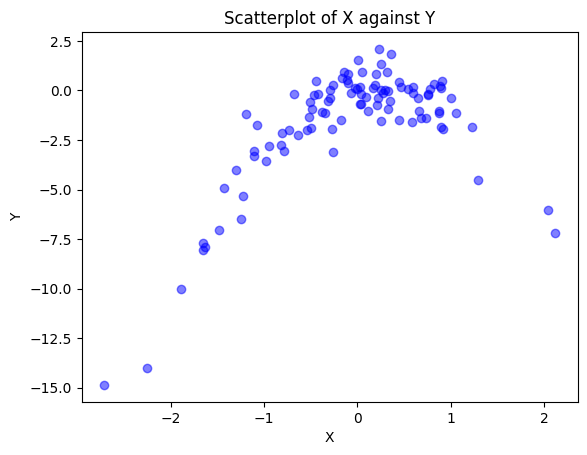

In [2]:
# Generate the data
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

# Create a scatter plot of X against Y
plt.scatter(x, y, color='blue', alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X against Y")
plt.show()


The scatterplot shows a clear nonlinear relationship between \( X \) and \( Y \). Specifically, as \( X \) increases, \( Y \) initially increases but then decreases, creating a parabolic shape. This pattern is consistent with the model $ Y = x − 2x^2 + 𝜖 $, where the quadratic term $ -2x^2 $ dominates as \( X \) values move away from zero, causing \( Y \) to decrease. The added noise 𝜖 introduces some spread around this general trend.


(c) Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares:

i. Y = $ \beta_0 + \beta_1X  + ϵ$

ii. Y = $ \beta_0 + \beta_1X  + \beta_2 X^2 + ϵ$

iii. Y = $ \beta_0 + \beta_1X  + \beta_2 X^2 + \beta_3 X^3 + ϵ$

iv. Y = $ \beta_0 + \beta_1X  + \beta_2 X^2 + \beta_3 X^3 + \beta_4 X^4 + ϵ$

Note you may find it helpful to use the data.frame() function
to create a single data set containing both X and Y .

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression

# Set a random seed for reproducibility
np.random.seed(1)

# Generate the data
x = np.random.normal(size=100)
y = x - 2 * x**2 + np.random.normal(size=100)

# Create a DataFrame with X and Y
data = pd.DataFrame({'X': x, 'Y': y})

# Define a function to calculate LOOCV error for a given polynomial degree
def loocv_error(X, y, degree):
    loo = LeaveOneOut()
    errors = []
    for train_index, test_index in loo.split(X):
        # Split data into training and testing sets for LOOCV
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Generate polynomial features for the given degree
        poly_features = np.vander(X_train, N=degree+1, increasing=True)
        model = LinearRegression()
        model.fit(poly_features, y_train)

        # Generate polynomial features for the test point and predict
        poly_test = np.vander(X_test, N=degree+1, increasing=True)
        y_pred = model.predict(poly_test)

        # Calculate the squared error and add to the errors list
        errors.append((y_pred - y_test)**2)

    # Return the mean of squared errors
    return np.mean(errors)

# Compute and print LOOCV errors for polynomial models of degree 1 to 4
for degree in range(1, 5):
    error = loocv_error(x, y, degree)
    print(f"LOOCV Error for degree {degree}: {error:.4f}")


LOOCV Error for degree 1: 6.2608
LOOCV Error for degree 2: 0.9143
LOOCV Error for degree 3: 0.9269
LOOCV Error for degree 4: 0.8669


(d) Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression

# Set a new random seed for reproducibility
np.random.seed(42)  # Change the seed from 1 to 42

# Generate the data with the new seed
x = np.random.normal(size=100)
y = x - 2 * x**2 + np.random.normal(size=100)

# Create a DataFrame with X and Y
data = pd.DataFrame({'X': x, 'Y': y})

# Define a function to calculate LOOCV error for a given polynomial degree
def loocv_error(X, y, degree):
    loo = LeaveOneOut()
    errors = []
    for train_index, test_index in loo.split(X):
        # Split data into training and testing sets for LOOCV
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Generate polynomial features for the given degree
        poly_features = np.vander(X_train, N=degree+1, increasing=True)
        model = LinearRegression()
        model.fit(poly_features, y_train)

        # Generate polynomial features for the test point and predict
        poly_test = np.vander(X_test, N=degree+1, increasing=True)
        y_pred = model.predict(poly_test)

        # Calculate the squared error and add to the errors list
        errors.append((y_pred - y_test)**2)

    # Return the mean of squared errors
    return np.mean(errors)

# Compute and print LOOCV errors for polynomial models of degree 1 to 4 with the new seed
for degree in range(1, 5):
    error = loocv_error(x, y, degree)
    print(f"LOOCV Error for degree {degree}: {error:.4f}")


LOOCV Error for degree 1: 5.3030
LOOCV Error for degree 2: 0.9128
LOOCV Error for degree 3: 0.9570
LOOCV Error for degree 4: 0.9728


Results Comparison: After running this code, you’ll get a new set of LOOCV errors for each polynomial model. The results might differ from part (c) due to the random noise introduced when generating the y values. Changing the random seed alters the noise component in y, which can lead to different model fits and errors.

Explanation: The differences arise because each random seed produces a unique set of noise values for y, affecting the data distribution and thus the model fit. This change highlights how the model's performance can vary based on the specific data generated, even if the underlying function remains the same.

The model with the smallest LOOCV error in (c) is likely the degree 2 model because it best matches the true data-generating process, $ y = x − 2x^2 + 𝜖 $
 , which is quadratic. Higher-degree models (3 and 4) may have larger LOOCV errors due to overfitting, while the degree 1 model likely underfits by missing the quadratic term. Therefore, we expect the degree 2 model to perform best.

In [10]:
import statsmodels.api as sm

# Set a random seed for reproducibility
np.random.seed(1)

# Generate the data
x = np.random.normal(size=100)
y = x - 2 * x**2 + np.random.normal(size=100)

# Create a DataFrame with X and Y
data = pd.DataFrame({'X': x, 'Y': y})

# Function to fit and summarize a polynomial model of a given degree
def fit_model(data, degree):
    # Generate polynomial features
    X_poly = np.vander(data['X'], N=degree + 1, increasing=True)

    # Fit the model using statsmodels
    model = sm.OLS(data['Y'], X_poly).fit()

    # Print model summary
    print(f"Model Degree {degree} Summary:")
    print(model.summary())
    print("\n" + "="*50 + "\n")

# Fit models for degrees 1 to 4 and print summaries
for degree in range(1, 5):
    fit_model(data, degree)


Model Degree 1 Summary:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     9.997
Date:                Sun, 10 Nov 2024   Prob (F-statistic):            0.00209
Time:                        06:33:47   Log-Likelihood:                -228.87
No. Observations:                 100   AIC:                             461.7
Df Residuals:                      98   BIC:                             466.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4131      0

Look at the p-values for each term in each model:

Significant coefficients (p-value < 0.05) suggest the term is statistically important for predicting Y.
Insignificant coefficients (p-value > 0.05) in higher-degree models (e.g., terms like $ x^3 $ or $ x^4 $ in degree 3 and 4 models) indicate overfitting, as these terms likely capture noise rather than the true data relationship.

By examining the significance of the terms in each model, the degree 2 model is statistically justified as the best fit for the data.